|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:290px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="290"/></div>|<div style="width:330px"><img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="300"/></div>|
|---|---|--:|

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ogstools as ot
import ogs as ogs
import pyvista as pv
import plot_settings

# Coupled hydraulic and mechanical effects surrounding a borehole

### The model

The governing equations are the mixture momentum balance and the mixture volume balance (derived in lecture notes)

\begin{align*}
	\mathbf{0} &= \text{div}\, \left[ \boldsymbol{\sigma}' - \alpha_\text{B} p \mathbf{1} \right] + \rho \mathbf{b}
    \\
	0 &= \left[ \phi_\text{F} \beta_{p\text{FR}} + (\alpha_\text{B} - \phi_\text{F}) \beta_{p\text{SR}} \right] (p)'_\text{S} + \alpha_\text{B} \text{div}\, (\mathbf{u}_\text{S})'_\text{S} + \text{div}\,(\phi_\text{F} \mathbf{w}_\text{FS})
\end{align*}
which we can solve for solid displacements $\mathbf{u}_\text{S}$ and pore pressure $p$.

These PDEs are closed by

\begin{alignat*}{2}
\phi_\text{F}\,\mathbf{w}_\text{FS} &= -\,\frac{\mathbf{k}_\text{S}}{\mu_\text{FR}}\bigl(\nabla p \;-\;\rho_\text{FR}\,\mathbf{b}\bigr)
    \quad &\text{(Darcy’s law)},
    \\[6pt]
\boldsymbol{\sigma}' &= \boldsymbol{\mathcal{C}} \,:\, \boldsymbol{\varepsilon}
    \quad &\text{(Linear elasticity)},
    \\[6pt]
\boldsymbol{\varepsilon} &= \frac{1}{2} \bigl[\nabla \mathbf{u}_\text{S} + (\nabla \mathbf{u}_\text{S})^\text{T} \bigr]
    \quad &\text{(Kinematics).}
\end{alignat*}

### The problem

Diameter of borehole: 244 mm

Vertical stress: 10 MPa, horizontal stress: 8 MPa (isotropic)

Hydrostatic water pressure: 4.5 MPa (around 500 m true vertical depth).

### Mesh generation

In [2]:
r_borehole = .122
l_domain = 10.
h_domain = 1.122
l_min = 0.03

In [3]:
ogs.cli.generateStructuredMesh(o='borehole.vtu',e='quad',lx=l_domain,ly=h_domain,dx0=l_min,mx=1.07,ny=2,ox=r_borehole)

[2025-04-11 14:32:48.321] [ogs] [info] Mesh created: 144 nodes, 94 elements.


0

In [4]:
ogs.cli.createQuadraticMesh(i='borehole.vtu',o='borehole_q8.vtu')

[2025-04-11 14:32:48.806] [ogs] [info] Create a quadratic order mesh
[2025-04-11 14:32:48.807] [ogs] [info] Save the new mesh into a file


0

In [5]:
mesh = pv.read("borehole.vtu")
# Calculate the mesh size in x and y directions
#mesh.points[:, 1] *= 300

plotter = pv.Plotter(window_size=[1000,400])
plotter.add_mesh(mesh, show_edges=True, show_scalar_bar=False, colormap="coolwarm")

plotter.show_bounds(ticks="outside", show_xaxis=True, show_yaxis=False, xtitle="$r$ / m", show_xlabels=True, bold=False)
plotter.view_xy()
#plotter.camera.zoom(2)
plotter.show()

Widget(value='<iframe src="http://localhost:44803/index.html?ui=P_0x730013361190_0&reconnect=auto" class="pyvi…

In [6]:
ogs.cli.ExtractBoundary(i = 'borehole_q8.vtu', o='boundaries_q8.vtu')

[2025-04-11 14:32:49.832] [ogs] [info] Mesh read: 381 nodes, 94 elements.
[2025-04-11 14:32:49.833] [ogs] [info] 0 property vectors copied, 0 vectors skipped.
[2025-04-11 14:32:49.833] [ogs] [info] Created surface mesh: 196 nodes, 98 elements.


0

In [7]:
tol = l_min/100
ogs.cli.removeMeshElements(i='boundaries_q8.vtu',o='geometry_farfield.vtu',**{"x-max": l_domain+r_borehole-tol})
ogs.cli.removeMeshElements(i='boundaries_q8.vtu',o='geometry_borehole.vtu',**{"x-min": r_borehole+tol})
ogs.cli.removeMeshElements(i='boundaries_q8.vtu',o='geometry_top.vtu',**{"y-max": h_domain-tol})
ogs.cli.removeMeshElements(i='boundaries_q8.vtu',o='geometry_bottom.vtu',**{"y-min": tol})

[2025-04-11 14:32:49.857] [ogs] [info] Mesh read: 196 nodes, 98 elements.
[2025-04-11 14:32:49.857] [ogs] [info] Bounding box of "boundaries_q8" is
x = [0.122000,10.122000]
y = [0.000000,1.122000]
z = [0.000000,0.000000]
[2025-04-11 14:32:49.857] [ogs] [info] 96 elements found.
[2025-04-11 14:32:49.857] [ogs] [info] Removing total 96 elements...
[2025-04-11 14:32:49.857] [ogs] [info] 2 elements remain in mesh.
[2025-04-11 14:32:49.857] [ogs] [info] Removing total 191 nodes...
[2025-04-11 14:32:49.869] [ogs] [info] Mesh read: 196 nodes, 98 elements.
[2025-04-11 14:32:49.869] [ogs] [info] Bounding box of "boundaries_q8" is
x = [0.122000,10.122000]
y = [0.000000,1.122000]
z = [0.000000,0.000000]
[2025-04-11 14:32:49.869] [ogs] [info] 96 elements found.
[2025-04-11 14:32:49.869] [ogs] [info] Removing total 96 elements...
[2025-04-11 14:32:49.869] [ogs] [info] 2 elements remain in mesh.
[2025-04-11 14:32:49.869] [ogs] [info] Removing total 191 nodes...
[2025-04-11 14:32:49.879] [ogs] [info]

0

The fluid in this borehole section is in direct contact with the considered clay marl. The following fluid pressure and total stress boundary conditions are imposed onto the borehole wall.

In [8]:
#Bohrlochbedingungen
dt = np.array([0,365000,10,100,5,5,5,5,365*4,1])#d
p = np.array([45,45,45,45,130,130,45,90,90,45])#bar
s = np.array([80,80,45,45,130,130,45,90,90,45])#bar

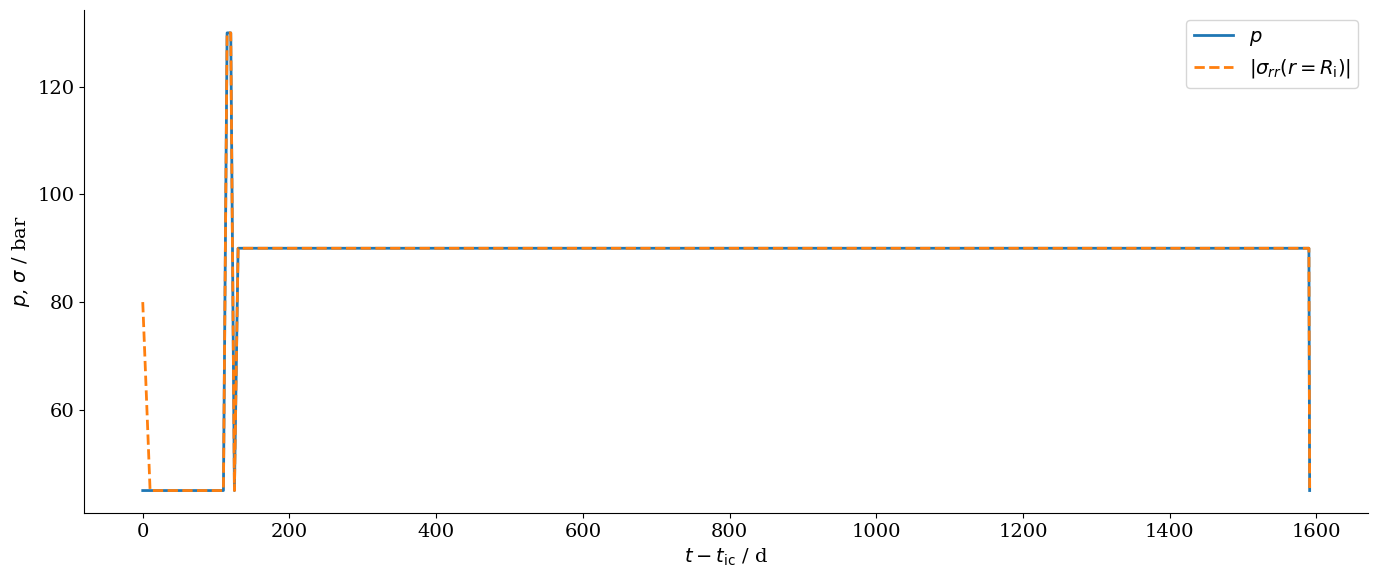

In [9]:
fig,ax = plt.subplots(figsize=(14,6))
ax.plot(dt.cumsum()[1:]-dt[1],p[1:],label='$p$')
ax.plot(dt.cumsum()[1:]-dt[1],s[1:],label='$|\\sigma_{rr}(r = R_\\mathrm{i})|$',ls='--')
ax.set_xlabel('$t-t_\\mathrm{ic}$ / d')
ax.set_ylabel('$p$, $\\sigma$ / bar')
ax.legend()
fig.tight_layout()

## Influende of the Biot coefficient $\alpha_\text{B}$

In [10]:
labels = ['initial', 'drilled', 'rest', 'frac start', 
          'frac end', 'rest', 'operation start', 'operation end', 'rest']

In [13]:
model_mc=ot.Project(input_file="borehole.prj", output_file="borehole_lin.prj")
model_mc.replace_medium_property_value(mediumid=0, name="biot_coefficient", value="0.8")
model_mc.replace_text("borehole_lin", xpath="./time_loop/output/prefix")

In [14]:
model_mc.write_input()
model_mc.run_model()

OGS finished with project file borehole_lin.prj.
Execution took 3.235318660736084 s
Project file written to output.


In [15]:
model_inc=ot.Project(input_file="borehole.prj", output_file="borehole_inc.prj")
model_inc.replace_medium_property_value(mediumid=0, name="biot_coefficient", value="1.0")

In [16]:
model_inc.replace_text("borehole_inc", xpath="./time_loop/output/prefix")

In [17]:
model_inc.write_input()
model_inc.run_model()

OGS finished with project file borehole_inc.prj.
Execution took 3.32749080657959 s
Project file written to output.


In [18]:
pvd_mc = ot.MeshSeries("borehole_lin.pvd")
pvd_inc = ot.MeshSeries("borehole_inc.pvd")

In [19]:
from collections import OrderedDict

def plot_results(version1, version2):
    fig, ax = plt.subplots(figsize=(14, 18), nrows=5, ncols=2)
    i, j = 0, 0
    colors = ['red', 'green', 'blue']

    legend_dict = OrderedDict()


    # Loop over times of interest
    for k, tt in enumerate(dt.cumsum()[1:]):
        idx = int((np.abs(pvd_mc.timevalues() - tt)).argmin())

        if j == 2:
            j = 0
            i += 1
        
        # -----------------------------------
        # 1) Plot on primary y-axis
        # -----------------------------------
        sample_v1 = version1[idx].sample_over_line([r_borehole, 0.5, 0], [3, 0.5, 0])
        sample_v2 = version2[idx].sample_over_line([r_borehole, 0.5, 0], [3, 0.5, 0])

        # X-coordinates (radial)
        x_v1 = sample_v1['Texture Coordinates'].T[0]
        x_v2 = sample_v2['Texture Coordinates'].T[0]

        # Plot pressure and stresses from version1
        l1 = ax[i][j].plot(x_v1, sample_v1['pressure_interpolated']/1e5,
                           color=colors[0], label=r"$p$")
        l2 = ax[i][j].plot(x_v1, -sample_v1['sigma'].T[0]/1e5,
                           ls='--', color=colors[1], label=r"$\sigma'_{rr}$")
        l3 = ax[i][j].plot(x_v1, -sample_v1['sigma'].T[2]/1e5,
                           ls=':', color=colors[2], label=r"$\sigma'_{\theta\theta}$")

        # Plot pressure and stresses from version2 (lower alpha)
        l4 = ax[i][j].plot(x_v2, sample_v2['pressure_interpolated']/1e5,
                           color=colors[0], alpha=0.2)
        l5 = ax[i][j].plot(x_v2, -sample_v2['sigma'].T[0]/1e5,
                           ls='--', color=colors[1], alpha=0.2)
        l6 = ax[i][j].plot(x_v2, -sample_v2['sigma'].T[2]/1e5,
                           ls=':', color=colors[2], alpha=0.2)

        ax[i][j].set_xlabel(r'$(r - r_\text{borehole})$ / m')
        ax[i][j].set_ylabel(r"$p$ / bar, $\sigma'$ / bar")

        # -----------------------------------
        # 2) Plot displacement/velocity on a secondary y-axis
        # -----------------------------------
        ax2 = ax[i][j].twinx()
        ax2.spines["right"].set_visible(True)

        # Example: displacement (ver1, ver2) and velocity (ver1, ver2)
        # If you only want to plot one or the other, remove the extra lines
        l7 = ax2.plot(x_v1, sample_v1['displacement'].T[0]*1e3, label=r"$u_r$",color='black',lw=1)
        l8 = ax2.plot(x_v2, sample_v2['displacement'].T[0]*1e3, alpha=0.2,color='black',lw=1)
        l9 = ax2.plot(x_v1, sample_v1['velocity'].T[0]*1e4, label=r"$v_r$",color='orange',lw=1)
        l10 = ax2.plot(x_v2, sample_v2['velocity'].T[0]*1e4, alpha=0.2,color='orange',lw=1)

        ax2.set_ylabel(r"$u_r$ / mm, $v_r$ / 100 µm s$^{-1}$")
        # -----------------------------------
        # 3) Combine legends
        # -----------------------------------
        # --- Collect the line handles & labels for each subplot. ---
        handles1, labels1 = ax[i][j].get_legend_handles_labels()
        # Secondary y-axis
        handles2, labels2 = ax2.get_legend_handles_labels()

        # Merge them into a single sequence
        all_handles = handles1 + handles2
        all_labels = labels1 + labels2

        # Insert into the dictionary, skipping duplicates
        for handle, label in zip(all_handles, all_labels):
            # Store in dict to avoid duplicates:
            # If label already exists, we'll keep the first handle (can adjust logic if you prefer last).
            if label not in legend_dict:
                legend_dict[label] = handle

        # Set subplot title
        ax[i][j].set_title(labels[k] if k < len(labels) else f"Time = {tt:g}",fontweight='bold')

        j += 1

    # Turn off the axis in the last subplot (optional),
    # if you only want the legend to appear there.
    ax[-1, -1].axis('off')
    
    # --- Create a single legend in ax[-1][-1]. ---
    ax[-1, -1].legend(
        legend_dict.values(),
        legend_dict.keys(),
        loc='center'
    )
    fig.tight_layout()
    plt.show()


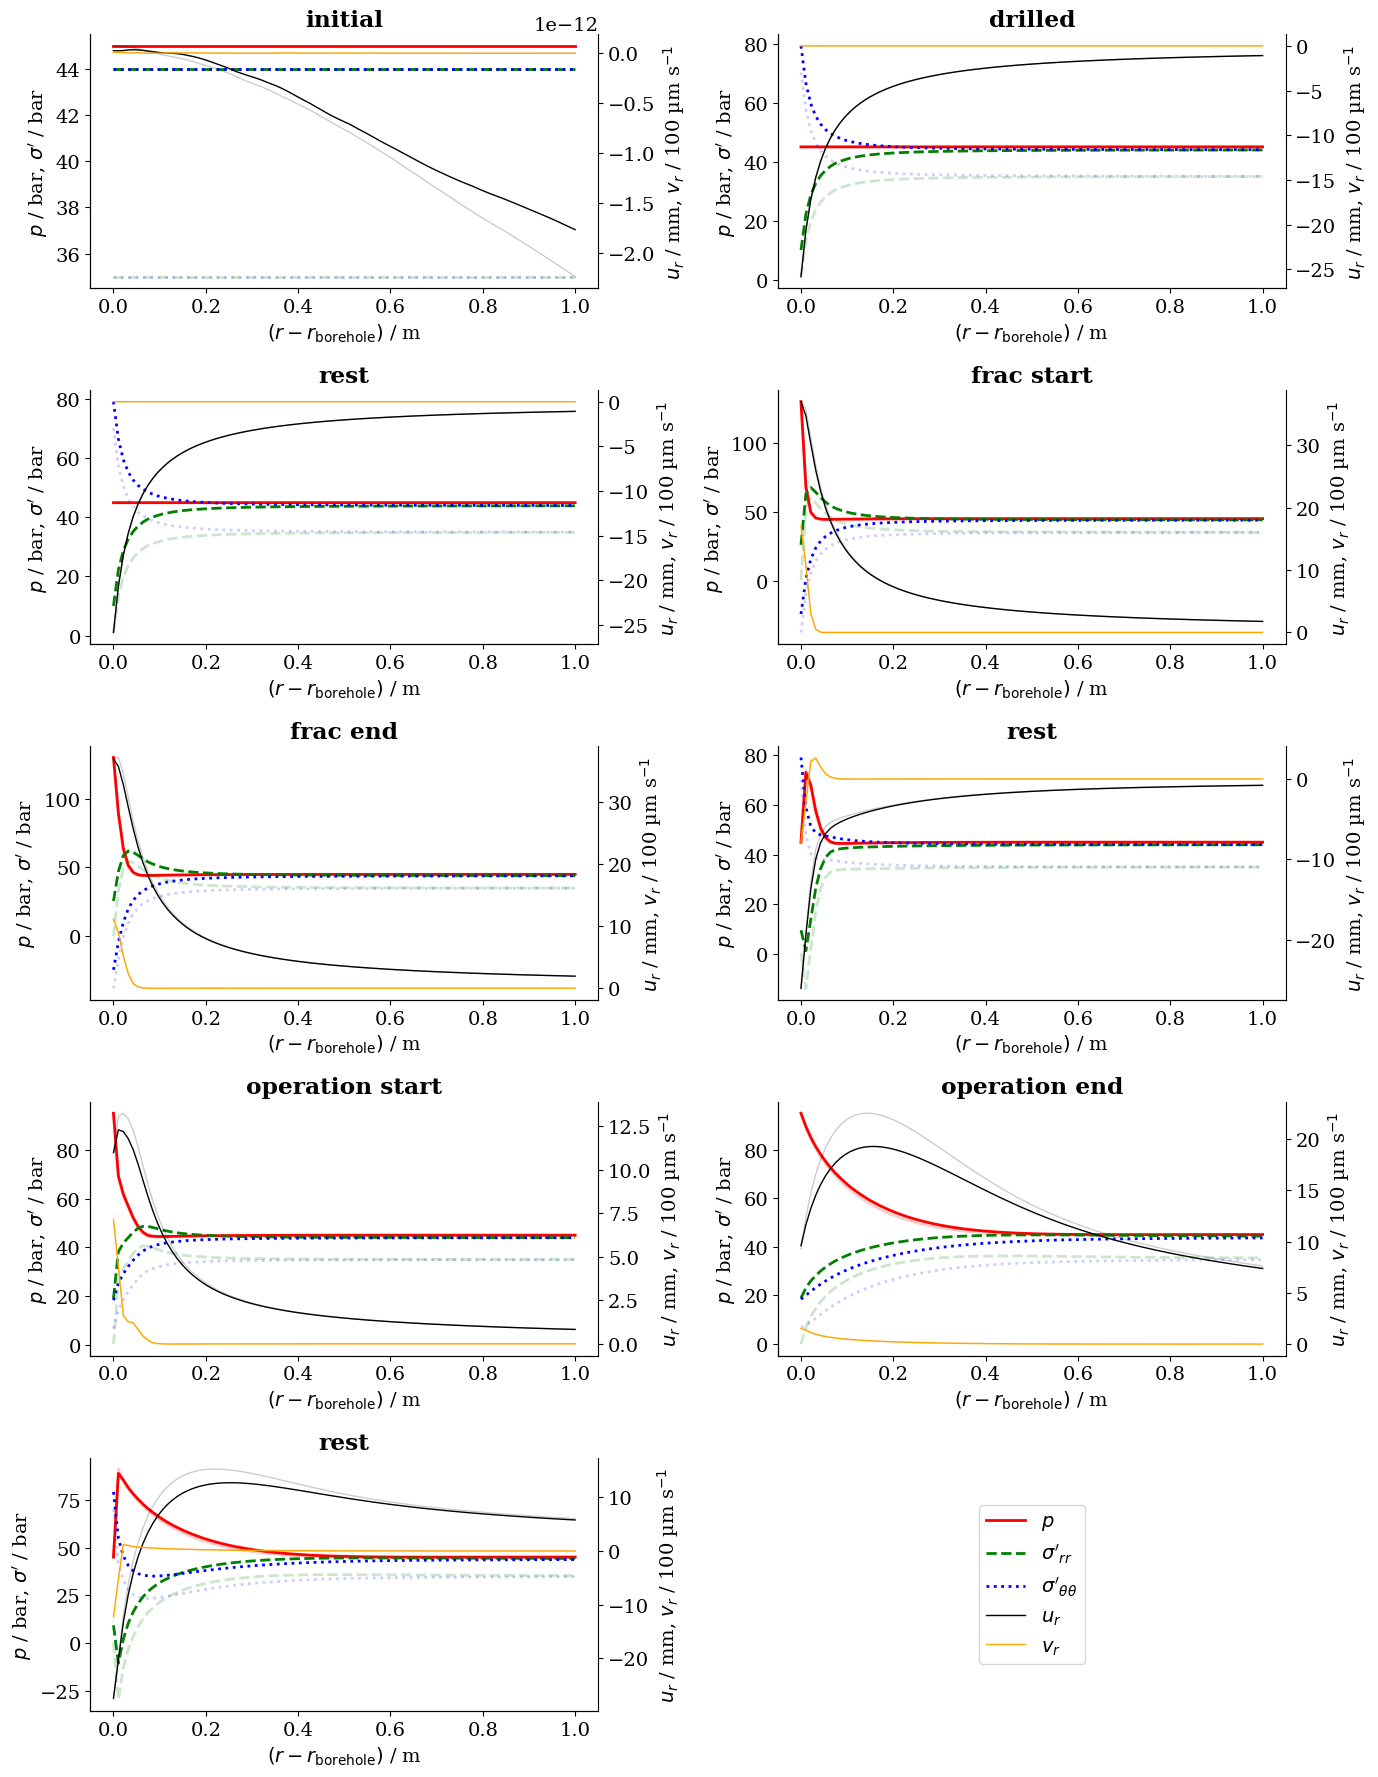

In [20]:
plot_results(pvd_mc,pvd_inc)

dark lines: $\alpha_\text{B} = 0.8$
transparent lines: $\alpha_\text{B} = 1.0$

## Comparison of finite element type: Quad8 vs. Quad4

In [21]:
model_lin=ot.Project(input_file="borehole.prj", output_file="borehole_lin.prj")
model_lin.replace_medium_property_value(mediumid=0, name="biot_coefficient", value="0.8")
model_lin.replace_text("borehole_lin", xpath="./time_loop/output/prefix")

In [22]:
model_lin.replace_text("borehole.vtu", xpath="./meshes/mesh", occurrence=0)
model_lin.replace_text("borehole", xpath="./parameters/parameter/mesh")
model_lin.replace_text("2", xpath="./processes/process/integration_order")
model_lin.replace_text("1", xpath="./process_variables/process_variable/order")

In [23]:
model_lin.write_input()

In [24]:
model_lin.run_model()

OGS finished with project file borehole_lin.prj.
Execution took 1.501260757446289 s
Project file written to output.


In [25]:
pvd_lin = ot.MeshSeries("borehole_lin.pvd")

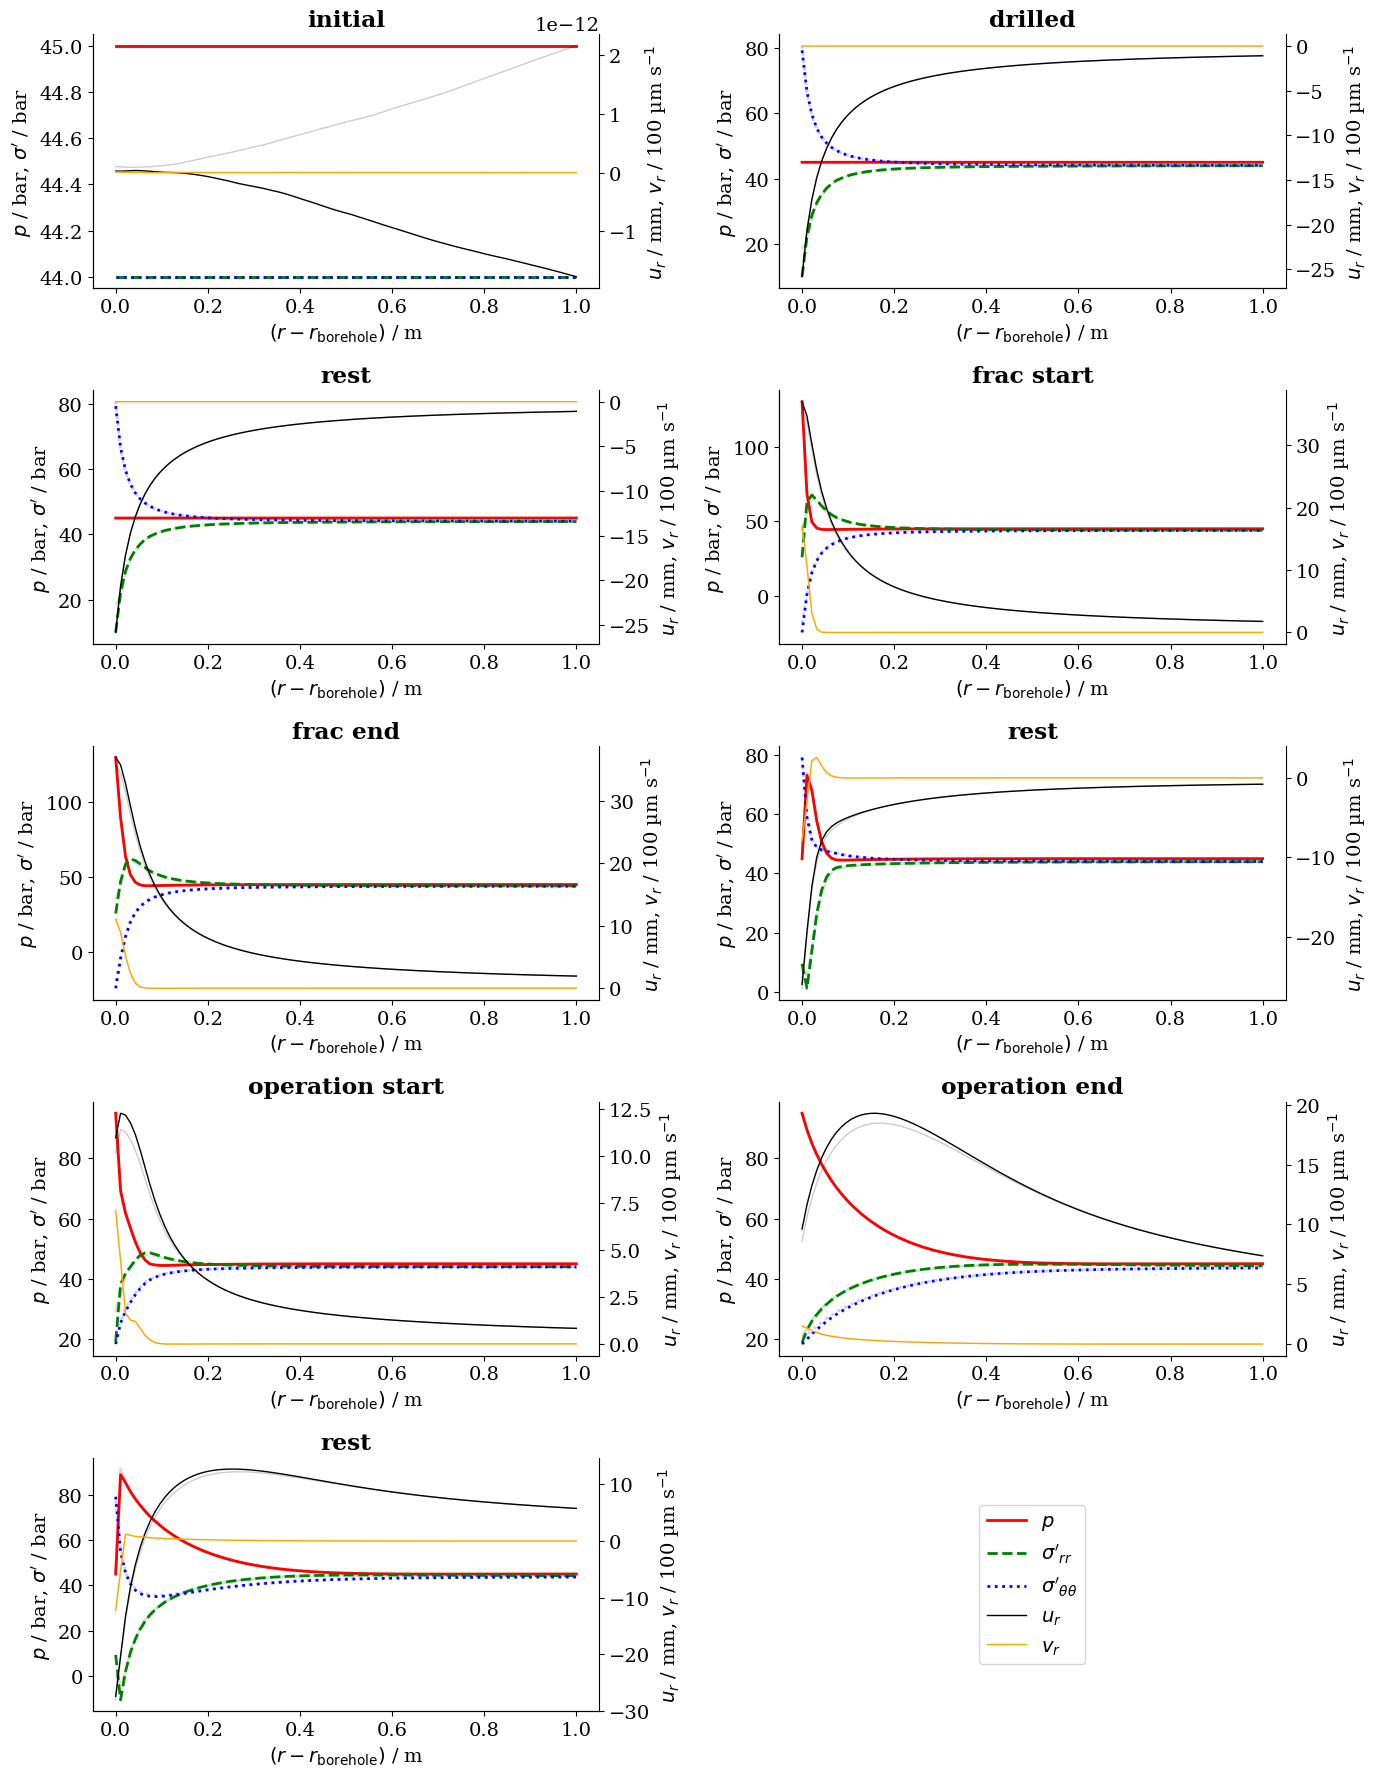

In [26]:
plot_results(pvd_mc,pvd_lin)

dar lines: Q8; transparent lines: Q4

## Influence of mass lumping

More info on mass lumping [here](https://mybinder.org/v2/gh/nagelt/Numerical_Methods_Introduction/HEAD?labpath=07d_Terzaghi_1D_consolidation_mass_lumping.ipynb).

In [27]:
model_lin_noML=ot.Project(input_file="borehole_lin.prj", output_file="borehole_lin_noML.prj")
model_lin_noML.replace_text("false", xpath="./processes/process/mass_lumping")
model_lin_noML.replace_text("borehole_lin_noML", xpath="./time_loop/output/prefix")
model_lin_noML.write_input()

In [28]:
model_lin_noML.run_model()

OGS finished with project file borehole_lin_noML.prj.
Execution took 1.4821255207061768 s
Project file written to output.


In [29]:
pvd_lin_noML = ot.MeshSeries("borehole_lin_noML.pvd")

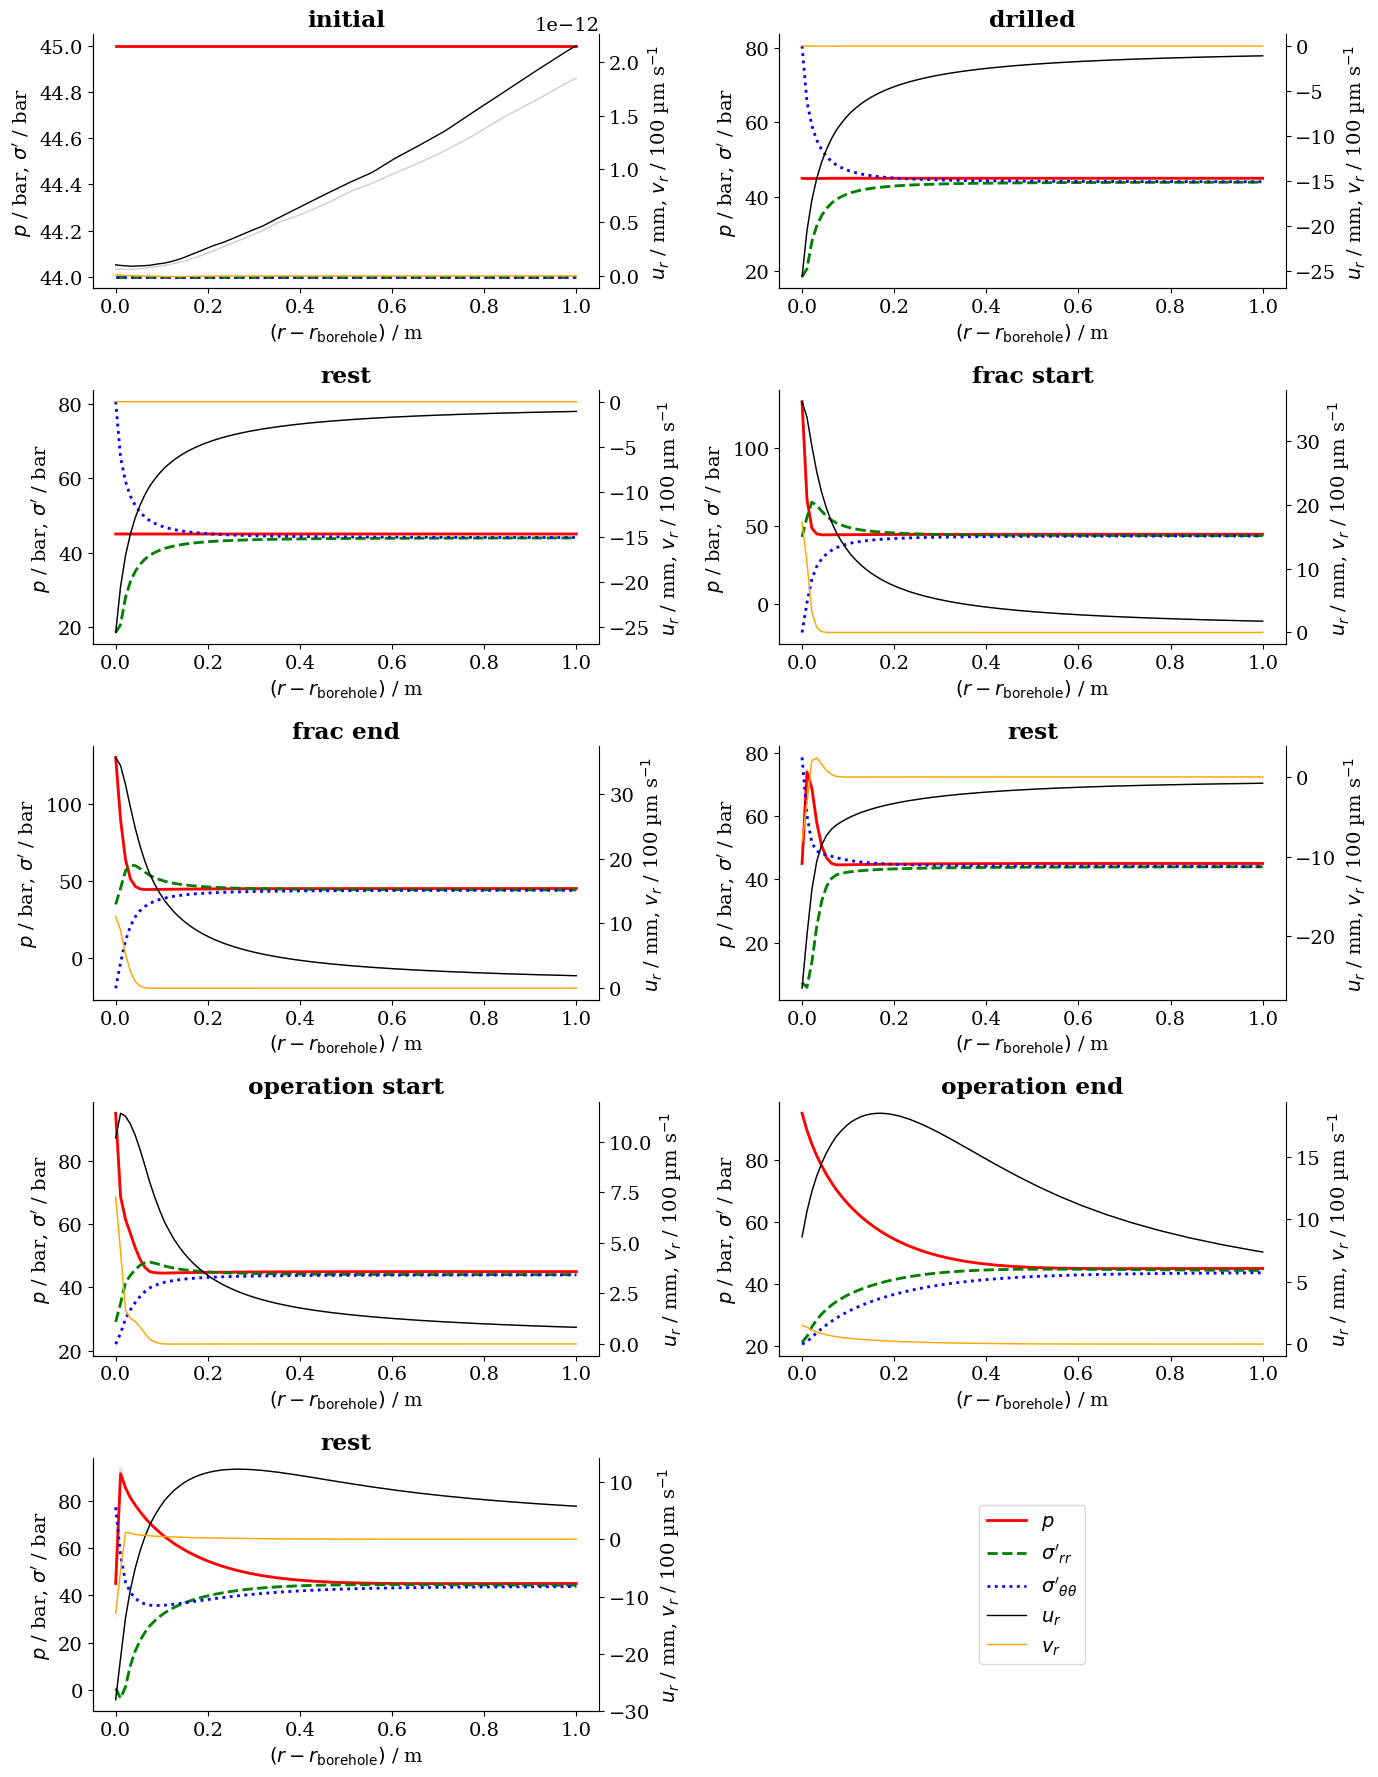

In [30]:
plot_results(pvd_lin,pvd_lin_noML)

dark lines: mass lumping; transparent lines: no mass lumping